In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ffs_green = '#77b800'
ffs_blue = '#009fe3'
ffs_pink = '#e6007e'
ffs_yellow = '#fecc00'

In [3]:
def split_comma_separated_index(series,delim=','):
    '''split comma separated items in series index, assign 1/n_names
    of value/count to each individual item.'''
    # split grants with multiple institutions
    for row in series.iteritems():
        name = row[0]
        amount = row[1]
        
        names = name.split(delim)
        n_names = len(names)
        if n_names>1:
            series = series.drop(name)
            
            for idx in names:
                idx = idx.strip()
                if series.index.contains(idx):
                    series[idx] += amount/n_names
                else:
                    series = series.append(pd.Series([amount/n_names],index=[idx]))
            
    return series

In [4]:
master = pd.read_excel('data/combined.xlsx')
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 19 columns):
MasterID                    398 non-null object
Holder                      391 non-null object
Email                       340 non-null object
Institution                 371 non-null object
PhD Student                 50 non-null object
Grant                       394 non-null object
Project Title               373 non-null object
Abstract                    217 non-null object
Status                      365 non-null object
Fund Amount                 362 non-null float64
Start date                  346 non-null datetime64[ns]
End date                    321 non-null object
Fight for Sight Priority    232 non-null object
Disease Area                287 non-null object
PSP Condition               192 non-null object
PSP Priority                189 non-null object
AMRC grant type             268 non-null object
Grant Type                  394 non-null object
Grant Year             

In [5]:
master.set_index('MasterID',inplace=True)
master['Start year'] = master['Start date'].dt.year

In [6]:
master.sample(5)

,Holder,Email,Institution,PhD Student,Grant,Project Title,Abstract,Status,Fund Amount,Start date,End date,Fight for Sight Priority,Disease Area,PSP Condition,PSP Priority,AMRC grant type,Grant Type,Grant Year,Start year
MasterID,,,,,,,,,,,,,,,,,,,
5085/5086,Miss Katie Williams,katie.williams@kcl.ac.uk,Moorfields Eye Hospital NHS Foundation Trust,NaN,OTRN 2018,Aetiology and Management of acute 6th cranial ...,This research aims to provide clearer evidence...,Letter in Preperation,4947.0,2019-02-01,2021-01-31 00:00:00,Understanding of Causes,6th Cranial Nerve Palsies,Childhood Onset Disorders,(3;1),Project,Other,2018.0,2019.0
5039/5040,Professor Robert MacLaren,maclaren@eye.ox.ac.uk,University of Oxford,Laurel Clare Chandler,PhD 2016,Investigating innate immune responses to retin...,Clinical trials of gene therapy for inherited ...,Active,100000.0,2017-10-01,2020-09-30,New Treatments,Retinal Diseases,Inherited Retinal Diseases,1,Postgraduate Studentship,PhD,2016.0,2017.0
1700/1701,Dr Denize Atan,Denize.Atan@bristol.ac.uk,University of Bristol,NaN,Small Grant Award 2015,Optimising stem cell therapies to treat retina...,The eye works a bit like a digital camera. In ...,Ended- Complete,14997.0,2016-02-15,2017-01-14,New Treatments,Retinal Diseases,AMD; Inherited Retinal Diseases; Vitreoretina...,4;1;8,Project (Small Grant Award),Small Grant,2015.0,2016.0
1880,Professor Irwin McLean,w.h.i.mclean@dundee.ac.uk,University of Dundee,NaN,Project 2010,Knockout-replacement gene therapy for dominant...,NaN,Ended- Complete,159524.0,2010-10-01,2013-09-01,NaN,NaN,NaN,NaN,Project,Project,2010.0,2010.0
1742/1743,Dr Tony Redmond,RedmondT1@cardiff.ac.uk,Cardiff University,Melissa Wright,PhD 2015,Changes in the visual cortex in glaucoma and t...,Glaucoma is sometimes called the silent thief ...,Active,99998.0,2016-10-01,2019-09-30,Early Diagnosis,Glaucoma,Glaucoma; Neuro-ophthalmology,(2;4;6;7);6,Postgraduate Studentship,PhD,2015.0,2016.0


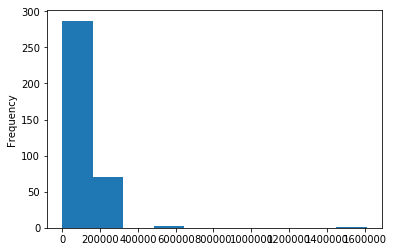

In [7]:
#matplotlib.rcParams.update({'font.size': 16})

master['Fund Amount'].plot.hist()

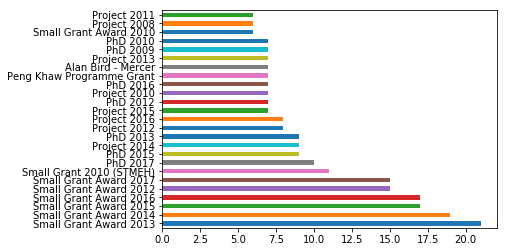

In [8]:
master['Grant'].value_counts().head(25).plot.barh()

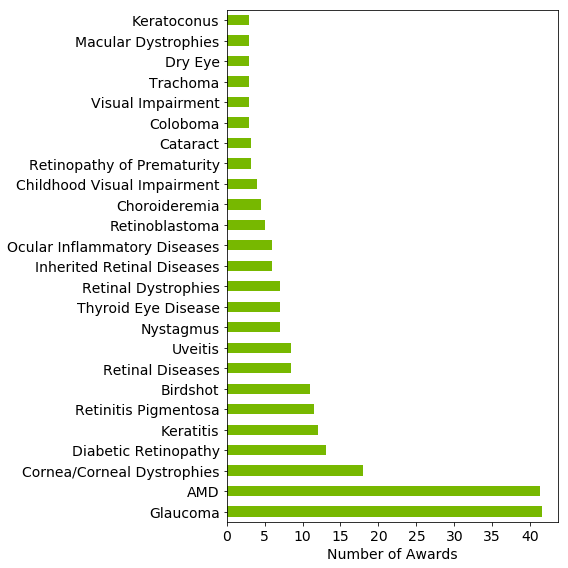

In [9]:
disease_area_count = master['Disease Area'].value_counts()
disease_area_count = split_comma_separated_index(disease_area_count)
disease_area_count.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(8,8))
disease_area_count.head(25).plot.barh(color=ffs_green,fontsize=14)
plt.xlabel('Number of Awards',fontsize=14)

plt.tight_layout()
plt.savefig('plots/awards_count_by_disease_area.png',dpi=300)

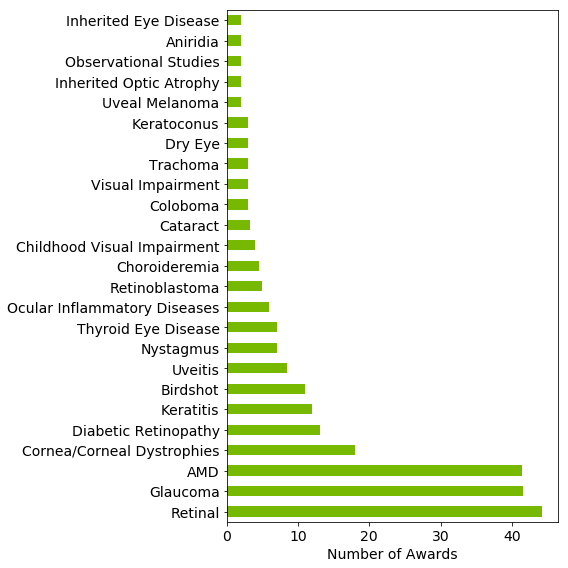

In [10]:
retinal_diseases = ['Stargardts Disease', 'Retinal Detachment','Retinal Diseases',
                    'Retinal Dystrophies','Retinitis Pigmentosa','Retinopathy of Prematurity',
                    'Macular Dystrophies','Inherited Retinal Diseases']

retinal_counts = disease_area_count[retinal_diseases]
all_counts = disease_area_count.drop(retinal_diseases)
all_counts['Retinal'] = retinal_counts.sum()
all_counts.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(8,8))
all_counts.head(25).plot.barh(color=ffs_green,fontsize=14)
plt.xlabel('Number of Awards',fontsize=14)

plt.tight_layout()
plt.savefig('plots/retinalGrouped_count_by_disease_area.png',dpi=300)

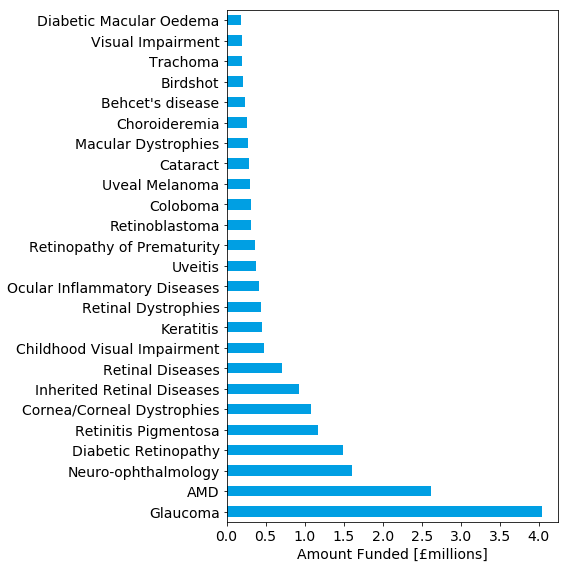

In [11]:
disease_area_amount = master.groupby('Disease Area')['Fund Amount'].sum()
disease_area_amount = split_comma_separated_index(disease_area_amount)
disease_area_amount.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(8,8))
(disease_area_amount/1e6).head(25).plot.barh(color=ffs_blue,fontsize=14)
plt.xlabel('Amount Funded [£millions]',fontsize=14)

plt.tight_layout()
plt.savefig('plots/awards_amount_by_disease_area.png',dpi=300)

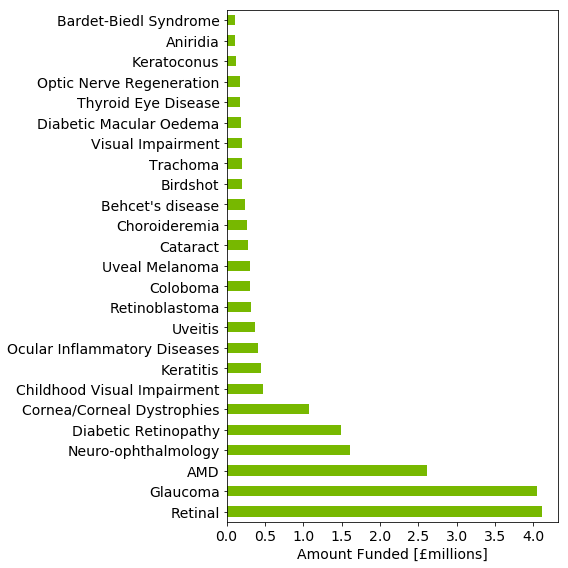

In [12]:
retinal_amounts = disease_area_amount[retinal_diseases]
all_amounts = disease_area_amount.drop(retinal_diseases)
all_amounts['Retinal'] = retinal_amounts.sum()
all_amounts.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(8,8))
(all_amounts/1e6).head(25).plot.barh(color=ffs_green,fontsize=14)
plt.xlabel('Amount Funded [£millions]',fontsize=14)

plt.tight_layout()
plt.savefig('plots/retinalGrouped_amount_by_disease_area.png',dpi=300)

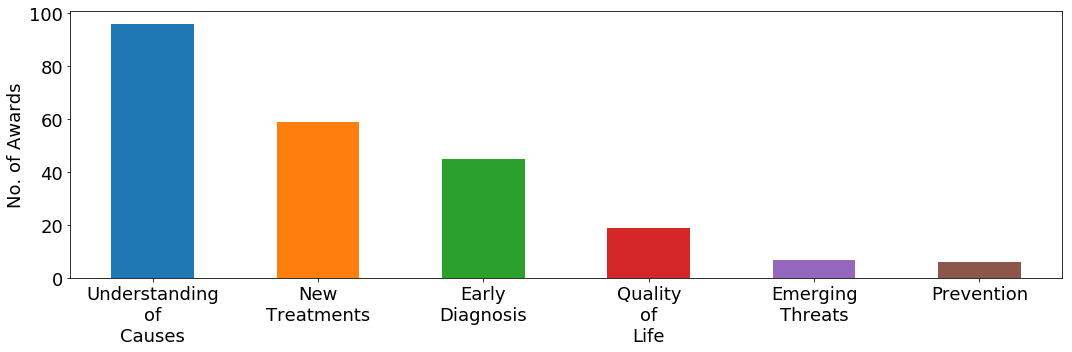

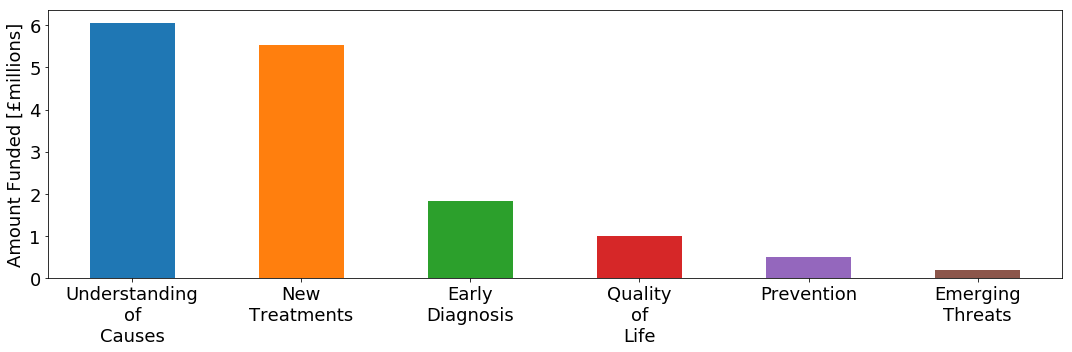

In [13]:
ffs_priority_count = master['Fight for Sight Priority'].value_counts()
ffs_priority_amount = master.groupby('Fight for Sight Priority')['Fund Amount'].sum()

plt.figure(figsize=(15,5))
ffs_priority_count.index = ffs_priority_count.index.str.replace(' ','\n')
ffs_priority_count.plot.bar(fontsize=18)
plt.ylabel('No. of Awards',fontsize=18)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('plots/awards_count_by_priority',dpi=300)


plt.figure(figsize=(15,5))
ffs_priority_amount.index = ffs_priority_amount.index.str.replace(' ','\n')
(ffs_priority_amount/1e6).sort_values(ascending=False).plot.bar(fontsize=18)
plt.ylabel('Amount Funded [£millions]',fontsize=18)
plt.xticks(rotation=0)
plt.xlabel('')
plt.tight_layout()
plt.savefig('plots/awards_amount_by_priority',dpi=300)


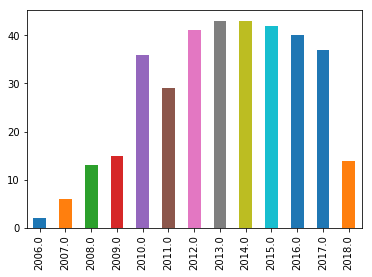

In [14]:
master['Grant Year'].value_counts().sort_index().plot.bar()

4155829.78

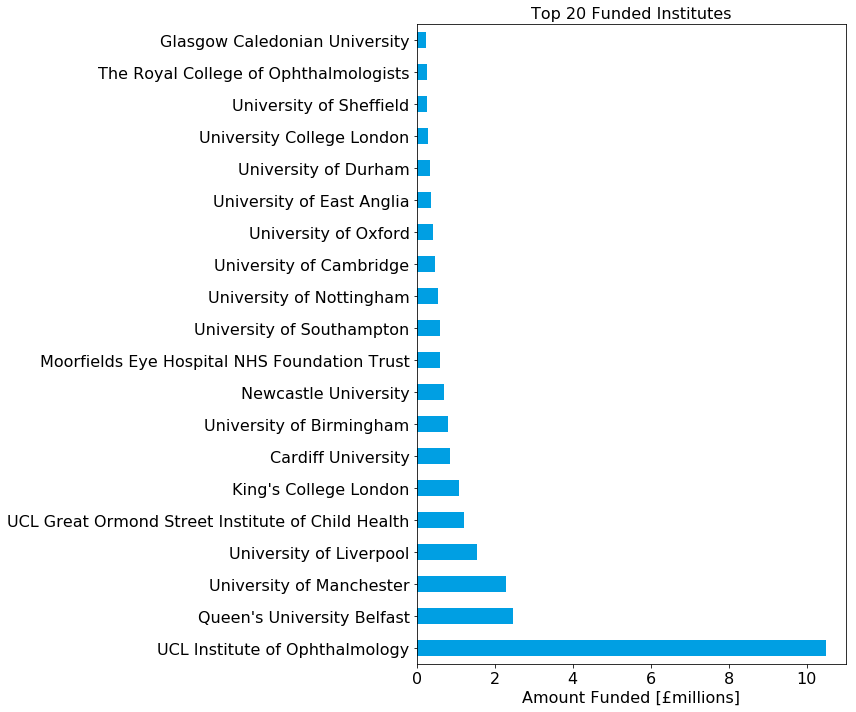

In [15]:
funded_by_institution = master.groupby('Institution')['Fund Amount'].sum()
funded_by_institution = split_comma_separated_index(funded_by_institution)
funded_by_institution.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(12,10))
(funded_by_institution[:20]/1e6).plot.barh(color=ffs_blue,fontsize=16)
plt.xlabel('Amount Funded [£millions]',fontsize=16)

plt.title('Top 20 Funded Institutes',fontsize=16)

plt.tight_layout()
plt.savefig('plots/amount_by_institution.png',dpi=300)

sum(funded_by_institution[20:])

64.0

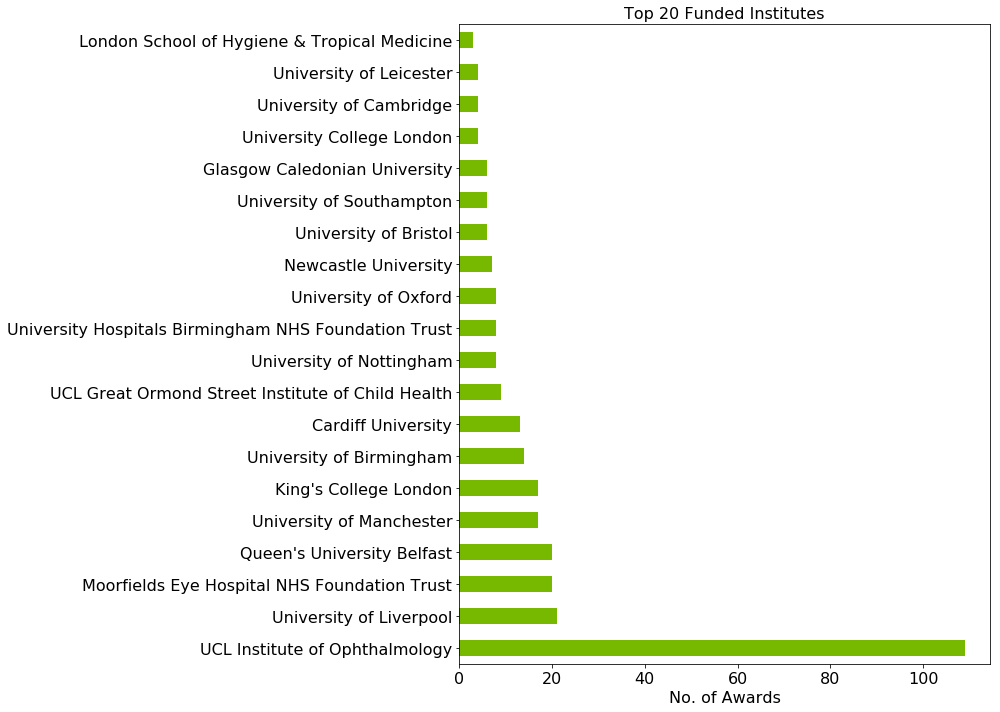

In [16]:
count_by_institution = master.groupby('Institution')['Grant Type'].count()
count_by_institution = split_comma_separated_index(count_by_institution)
count_by_institution.sort_values(ascending=False,inplace=True)

plt.figure(figsize=(14,10))
count_by_institution[:20].plot.barh(color=ffs_green,fontsize=16)
plt.xlabel('No. of Awards',fontsize=16)

plt.title('Top 20 Funded Institutes',fontsize=16)

plt.tight_layout()
plt.savefig('plots/count_by_institution.png',dpi=300)


sum(count_by_institution[20:])

Text(0,0.5,'Amount Funded [£millions]')

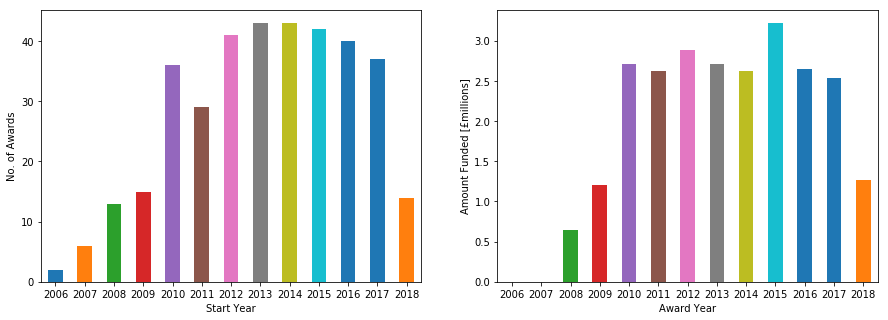

In [17]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
awards_per_year = master['Grant Year'].value_counts().sort_index()
awards_per_year.index = awards_per_year.index.astype(int)
awards_per_year.plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Start Year')
plt.ylabel('No. of Awards')

plt.subplot(1,2,2)
plt.xticks(rotation=0)
amount_per_year = master.groupby('Grant Year')['Fund Amount'].sum().sort_index()
amount_per_year.index = amount_per_year.index.astype(int)
(amount_per_year/1e6).plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Award Year')
plt.ylabel('Amount Funded [£millions]')

Text(0,0.5,'Amount Funded [£millions]')

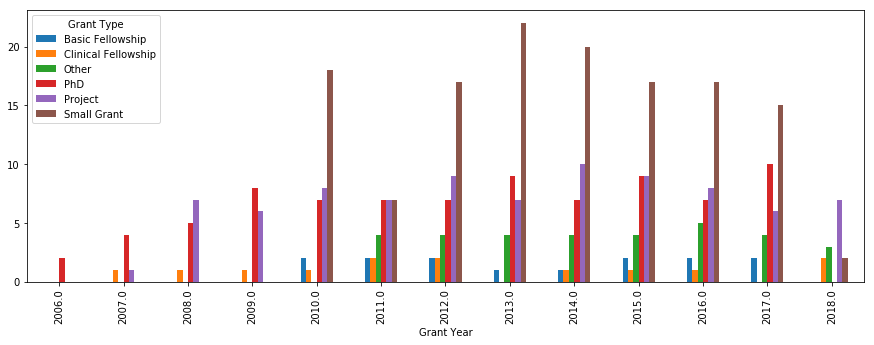

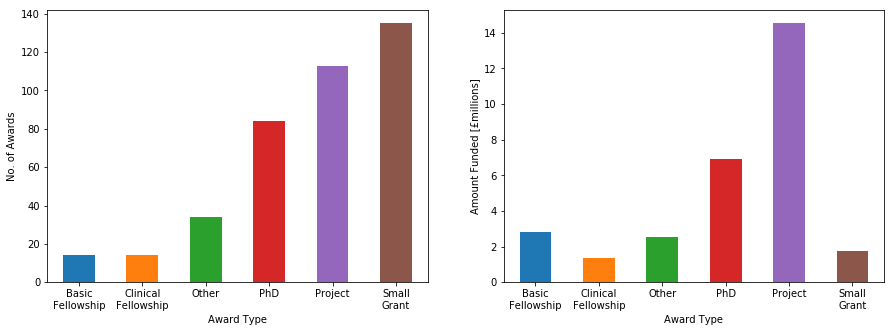

In [18]:
ax = plt.figure(figsize=(15,5)).gca()
master.groupby('Grant Year')['Grant Type'].value_counts(sort=False).unstack().plot.bar(ax=ax)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
num_grants_by_type = master['Grant Type'].value_counts().sort_index()
num_grants_by_type.index = num_grants_by_type.index.str.replace(' ','\n')

num_grants_by_type.plot.bar()

plt.xticks(rotation=0)
plt.xlabel('Award Type')
plt.ylabel('No. of Awards')

plt.subplot(1,2,2)
fund_amount_by_type = master.groupby('Grant Type')['Fund Amount'].sum()
fund_amount_by_type.index = fund_amount_by_type.index.str.replace(' ','\n')
(fund_amount_by_type/1e6).plot.bar()
plt.xticks(rotation=0)
plt.xlabel('Award Type')
plt.ylabel('Amount Funded [£millions]')